In [1]:
#Importing Libraries
import os
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import load_img, ImageDataGenerator
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten

In [7]:
import os

count = 0
base_path = r'C:\flowers.project\Images'  
dirs = os.listdir(base_path)

for dir in dirs:
    folder_path = os.path.join(base_path, dir)
    files = list(os.listdir(folder_path))
    print(dir + ' Folder has ' + str(len(files)) + ' Images')
    count += len(files)

print('Images Folder has ' + str(count) + ' Images')


daisy Folder has 764 Images
dandelion Folder has 1052 Images
rose Folder has 784 Images
sunflower Folder has 733 Images
tulip Folder has 984 Images
Images Folder has 4317 Images


In [10]:
base_dir =r'C:\flowers.project\Images'
img_size = 180
batch = 32

In [11]:
train_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'training',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

val_ds = tf.keras.utils.image_dataset_from_directory( base_dir,
                                                       seed = 123,
                                                       validation_split=0.2,
                                                       subset = 'validation',
                                                       batch_size=batch,
                                                       image_size=(img_size,img_size))

Found 4317 files belonging to 5 classes.
Using 3454 files for training.
Found 4317 files belonging to 5 classes.
Using 863 files for validation.


In [12]:
flower_names = train_ds.class_names
flower_names

['daisy', 'dandelion', 'rose', 'sunflower', 'tulip']

In [13]:
import matplotlib.pyplot as plt

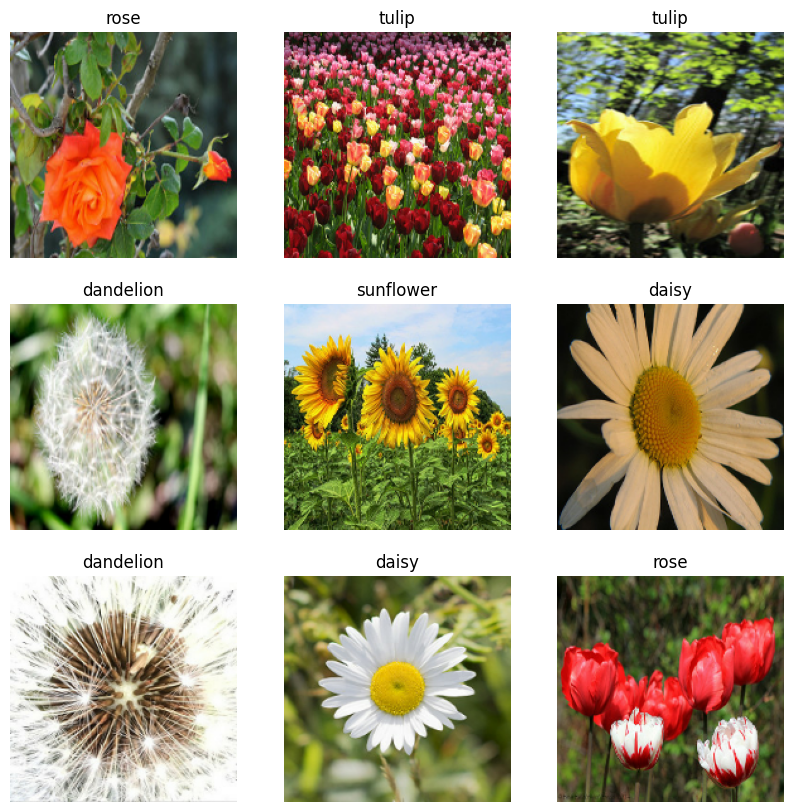

In [14]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        plt.subplot(3,3, i+1)
        plt.imshow(images[i].numpy().astype('uint8'))
        plt.title(flower_names[labels[i]])
        plt.axis('off')

In [15]:
AUTOTUNE = tf.data.AUTOTUNE

In [16]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size = AUTOTUNE)

In [17]:
val_ds = val_ds.cache().prefetch(buffer_size = AUTOTUNE)

In [18]:
from keras import Input
from keras.models import Sequential
from keras.layers import RandomFlip, RandomRotation, RandomZoom

data_augmentation = Sequential([
    Input(shape=(img_size, img_size, 3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)
])


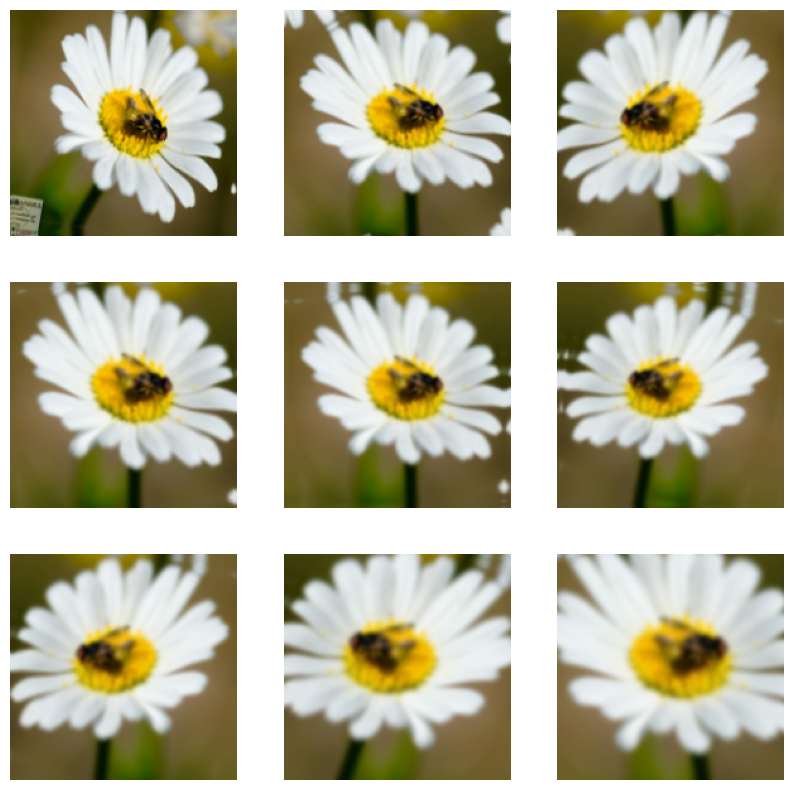

In [20]:
i = 0
plt.figure(figsize=(10,10))

for images, labels in train_ds.take(1):
    for i in range(9):
        images = data_augmentation(images)
        plt.subplot(3,3, i+1)
        plt.imshow(images[0].numpy().astype('uint8'))
        plt.axis('off')

In [21]:
model = Sequential([
    data_augmentation,
    layers.Rescaling(1./255),
    Conv2D(16, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(5)
])

In [22]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [23]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential (Sequential)              │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 32)          │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 45, 45, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 22, 22, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30976)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,965,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             645 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,989,285 (15.22 MB)

 Trainable params: 3,989,285 (15.22 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
history = model.fit(train_ds, epochs=15, validation_data=val_ds)

Epoch 1/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 62s 508ms/step - accuracy: 0.3205 - loss: 1.8065 - val_accuracy: 0.5180 - val_loss: 1.1463
Epoch 2/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 459ms/step - accuracy: 0.5251 - loss: 1.1305 - val_accuracy: 0.4902 - val_loss: 1.2339
Epoch 3/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 485ms/step - accuracy: 0.5591 - loss: 1.0915 - val_accuracy: 0.5156 - val_loss: 1.1672
Epoch 4/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 51s 469ms/step - accuracy: 0.6239 - loss: 0.9872 - val_accuracy: 0.6222 - val_loss: 0.9500
Epoch 5/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 458ms/step - accuracy: 0.6372 - loss: 0.9292 - val_accuracy: 0.6315 - val_loss: 0.9847
Epoch 6/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 50s 461ms/step - accuracy: 0.6893 - loss: 0.8301 - val_accuracy: 0.6779 - val_loss: 0.8421
Epoch 7/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 52s 480ms/step - accuracy: 0.6957 - loss: 0.8039 - val_accuracy: 0.6489 - val_loss: 0.9614
Epoch 8/15
108/108 ━━━━━━━━━━━━━━━━━━━━ 55s 508ms/step - accuracy: 0.7272 - loss: 0

In [25]:
def classify_images(image_path):
    input_image = tf.keras.utils.load_img(image_path, target_size=(180,180))
    input_image_array = tf.keras.utils.img_to_array(input_image)
    input_image_exp_dim = tf.expand_dims(input_image_array,0)

    predictions = model.predict(input_image_exp_dim)
    result = tf.nn.softmax(predictions[0])
    outcome = 'The Image belongs to ' + flower_names[np.argmax(result)] + ' with a score of '+ str(np.max(result)*100)
    return outcome

In [27]:
classify_images(r'C:\flowers.project\sample\daisy.png')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 740ms/step


'The Image belongs to daisy with a score of 99.99917'

In [28]:
model.save('Flower_Recog_Model.keras')